<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/DL/%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%BE%D1%81%D0%BD%D0%BE%D0%B2%D1%8B_Generative_Adversarial_Networks_(GANs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Математические основы Generative Adversarial Networks (GANs)**

Generative Adversarial Networks (GANs) представляют собой семейство генеративных моделей, предназначенных для восстановления неизвестного распределения, лежащего в основе процесса генерации данных. Это распределение восстанавливается посредством состязательного взаимодействия между двумя моделями: генератором и дискриминатором. Как уже обсуждалось в предыдущих вводных материалах по GANs, эти модели обучаются таким образом, что дискриминатор стремится корректно классифицировать реальные и сгенерированные данные, в то время как генератор пытается минимизировать способность дискриминатора к различию, создавая данные, максимально похожие на реальные.

В данной лекции мы подробно рассмотрим математические основы GANs. Основным источником для анализа является работа *"Generative Adversarial Nets"* (Ian Goodfellow et al.), в которой впервые была предложена концепция GANs. Начнем с анализа этой статьи.

### Мотивация функции потерь

GANs можно рассматривать как систему, состоящую из двух взаимодействующих моделей: генератора и дискриминатора. Каждая из этих моделей имеет свою функцию потерь. В данном разделе мы попытаемся интуитивно обосновать вид функции потерь для каждой из моделей.

#### Обозначения

Для минимизации путаницы введем следующие обозначения, которые будут использоваться на протяжении всей лекции:

- $x$: Реальные данные.
- $z$: Латентный вектор (шум).
- $G(z)$: Сгенерированные данные.
- $D(x)$: Оценка дискриминатора для реальных данных.
- $D(G(z))$: Оценка дискриминатора для сгенерированных данных.
- $\text{Error}(a, b)$: Функция ошибки, измеряющая различие между $a$ и $b$.

#### Дискриминатор

Цель дискриминатора заключается в корректной классификации реальных данных как истинных ($1$), а сгенерированных данных как ложных ($0$). Таким образом, функция потерь для дискриминатора может быть записана следующим образом:

$$
L_D = \text{Error}(D(x), 1) + \text{Error}(D(G(z)), 0) \quad (1)
$$

Здесь $\text{Error}$ обозначает функцию, измеряющую различие между двумя величинами. Если данная запись напоминает вам кросс-энтропию или расхождение Кульбака-Лейблера, это не случайно, так как эти метрики широко используются в задачах классификации.

#### Генератор

Аналогичным образом можно определить функцию потерь для генератора. Цель генератора заключается в том, чтобы "обмануть" дискриминатор, заставив его классифицировать сгенерированные данные как реальные. Таким образом, функция потерь генератора может быть записана как:

$$
L_G = \text{Error}(D(G(z)), 1) \quad (2)
$$

Важно отметить, что функция потерь — это величина, которую необходимо минимизировать. В случае генератора, минимизация $L_G$ достигается, когда $D(G(z))$ приближается к $1$, что соответствует ошибочной классификации сгенерированных данных как реальных.

#### Бинарная кросс-энтропия

Одной из наиболее распространенных функций потерь в задачах бинарной классификации является бинарная кросс-энтропия. Напомним, что формула для кросс-энтропии имеет вид:

$$
H(p, q) = \mathbb{E}_{x \sim p(x)}[-\log q(x)] \quad (3)
$$

В задачах классификации случайная величина является дискретной, поэтому математическое ожидание может быть выражено в виде суммы:

$$
H(p, q) = -\sum_{x \in \chi} p(x) \log q(x) \quad (4)
$$

Для случая бинарной кросс-энтропии, где метки принимают значения $0$ или $1$, выражение упрощается:

$$
H(y, \hat{y}) = -\sum \left( y \log \hat{y} + (1 - y) \log (1 - \hat{y}) \right) \quad (5)
$$

Именно эта функция $\text{Error}$ использовалась в предыдущих разделах. Бинарная кросс-энтропия удовлетворяет нашим требованиям, так как она измеряет различие между двумя распределениями в контексте бинарной классификации. Применив эту функцию к выражениям (1) и (2), получим:

$$
L_D = -\sum_{x \in \chi, z \in \zeta} \left( \log D(x) + \log (1 - D(G(z))) \right) \quad (6)
$$

Аналогично для генератора:

$$
L_G = -\sum_{z \in \zeta} \log D(G(z)) \quad (7)
$$

Теперь мы имеем две функции потерь, которые могут быть использованы для обучения генератора и дискриминатора. Заметим, что для функции потерь генератора $L_G$ значение потерь будет малым, если $D(G(z))$ близко к $1$, так как $\log(1) = 0$. Это именно то поведение, которое мы ожидаем от функции потерь генератора. Аналогичная логика применима и к функции потерь дискриминатора $L_D$.


**Дополнительные замечания и оптимизация модели**

В оригинальной работе Goodfellow et al. представлен несколько иной вариант функций потерь по сравнению с теми, которые были выведены выше. Рассмотрим этот вариант:

$$
\max_D \left\{ \log(D(x)) + \log(1 - D(G(z))) \right\} \quad (8)
$$

Основное различие между выражениями (6) и (8) заключается в знаке и в том, минимизируется или максимизируется целевая функция. В (6) функция потерь была представлена как задача минимизации, тогда как в оригинальной формулировке она представлена как задача максимизации с обратным знаком.

Goodfellow далее формулирует задачу как минимаксную игру, в которой дискриминатор стремится максимизировать целевую функцию, а генератор — минимизировать её. Математически это выражается следующим образом:

$$
\min_G \max_D \left\{ \log(D(x)) + \log(1 - D(G(z))) \right\} \quad (9)
$$

Данная минимаксная формулировка компактно отражает состязательный характер взаимодействия между генератором и дискриминатором. Однако на практике используются отдельные функции потерь для генератора и дискриминатора, как было показано ранее. Это связано с тем, что градиент функции $y = \log(x)$ вблизи $x = 0$ является более крутым по сравнению с градиентом функции $y = \log(1 - x)$. Следовательно, максимизация $\log(D(G(z)))$ (или эквивалентная минимизация $-\log(D(G(z)))$) приводит к более быстрым и значительным улучшениям в работе генератора, чем минимизация $\log(1 - D(G(z)))$.

### Оптимизация модели

Теперь, когда функции потерь для генератора и дискриминатора определены, можно перейти к решению задачи оптимизации, то есть к поиску параметров моделей, которые минимизируют (или максимизируют) соответствующие функции потерь. На практике это соответствует процессу обучения модели.


## **Обучение дискриминатора**

При обучении Generative Adversarial Networks (GANs) обычно обучают одну модель за раз. Это означает, что при обучении дискриминатора генератор считается фиксированным. Такой подход был продемонстрирован в предыдущих материалах, посвященных построению базовой GAN.

Вернемся к минимаксной игре, описанной ранее. Целевая функция, которую мы рассматриваем, может быть выражена как функция от генератора $G$ и дискриминатора $D$. Назовем её функцией ценности (value function):

$$
V(G, D) = \mathbb{E}_{x \sim p_{\text{data}}}[\log(D(x))] + \mathbb{E}_{z \sim p_z}[\log(1 - D(G(z)))] \quad (10)
$$

Здесь:
- $p_{\text{data}}$ — распределение реальных данных,
- $p_z$ — распределение латентного вектора $z$,
- $D(x)$ — вероятность, присвоенная дискриминатором тому, что $x$ является реальным данным.

### Что такое $\mathbb{E}_{x \sim p_{\text{data}}}$?

Обозначение $\mathbb{E}_{x \sim p_{\text{data}}}$ означает **математическое ожидание** функции $\log(D(x))$, вычисленное по распределению реальных данных $p_{\text{data}}$. Математическое ожидание — это среднее значение функции по всем возможным значениям $x$, взятым из распределения $p_{\text{data}}$.

#### Подробнее:
1. **Математическое ожидание**:
   - Математическое ожидание $\mathbb{E}$ — это оператор, который возвращает среднее значение функции случайной величины. В данном случае функция — это $\log(D(x))$, а случайная величина — $x$, распределенная согласно $p_{\text{data}}$.

2. **Распределение $p_{\text{data}}$**:
   - $p_{\text{data}}$ — это распределение, из которого берутся реальные данные. Например, если мы работаем с изображениями, $p_{\text{data}}$ описывает вероятность появления каждого изображения в наборе данных.

3. **Интегральная форма**:
   - Математическое ожидание можно выразить через интеграл:
     $$
     \mathbb{E}_{x \sim p_{\text{data}}}[\log(D(x))] = \int_{x \in \chi} p_{\text{data}}(x) \log(D(x)) \, dx
     $$
     где $\chi$ — это пространство всех возможных значений $x$.

4. **Практическая аппроксимация**:
   - На практике, когда у нас есть конечный набор данных, математическое ожидание аппроксимируется средним значением по всем доступным образцам:
     $$
     \mathbb{E}_{x \sim p_{\text{data}}}[\log(D(x))] \approx \frac{1}{N} \sum_{i=1}^N \log(D(x_i))
     $$
     где $x_i$ — это реальные данные из обучающего набора, а $N$ — количество образцов.

### Продолжение о функции ценности:

На практике нас больше интересует распределение, моделируемое генератором, чем $p_z$. Поэтому введем новую переменную $y = G(z)$, которая представляет сгенерированные данные. Используя эту подстановку, перепишем функцию ценности:

$$
V(G, D) = \mathbb{E}_{x \sim p_{\text{data}}}[\log(D(x))] + \mathbb{E}_{y \sim p_g}[\log(1 - D(y))] \quad (11)
$$

где $p_g$ — распределение сгенерированных данных. В интегральной форме это выражение принимает вид:

$$
V(G, D) = \int_{x \in \chi} \left( p_{\text{data}}(x) \log(D(x)) + p_g(x) \log(1 - D(x)) \right) dx \quad (11)
$$

Цель дискриминатора заключается в максимизации этой функции ценности. Чтобы найти оптимальный дискриминатор $D^*(x)$, возьмем частную производную $V(G, D)$ по $D(x)$ и приравняем её к нулю:

$$
\frac{\partial V(G, D)}{\partial D(x)} = \frac{p_{\text{data}}(x)}{D(x)} - \frac{p_g(x)}{1 - D(x)} = 0 \quad (12)
$$

Решая это уравнение относительно $D(x)$, получаем оптимальный дискриминатор:

$$
D^*(x) = \frac{p_{\text{data}}(x)}{p_{\text{data}}(x) + p_g(x)} \quad (12)
$$

Это условие для оптимального дискриминатора. Данная формула интуитивно понятна:
- Если образец $x$ является реальным, то $p_{\text{data}}(x)$ близко к 1, а $p_g(x)$ близко к 0. В этом случае $D^*(x)$ стремится к 1, что соответствует корректной классификации.
- Если образец $x = G(z)$ является сгенерированным, то $p_{\text{data}}(G(z))$ близко к 0, и $D^*(x)$ стремится к 0, что также соответствует корректной классификации.


##**Обучение генератора**

Для обучения генератора предполагается, что дискриминатор фиксирован, и проводится анализ функции ценности $V(G, D^*)$. Подставим в функцию ценности оптимальный дискриминатор $D^*(x)$, найденный ранее (формула (12)):

$$
V(G, D^*) = \mathbb{E}_{x \sim p_{\text{data}}} \left[ \log(D^*(x)) \right] + \mathbb{E}_{x \sim p_g} \left[ \log(1 - D^*(x)) \right]
= \mathbb{E}_{x \sim p_{\text{data}}} \left[ \log \left( \frac{p_{\text{data}}(x)}{p_{\text{data}}(x) + p_g(x)} \right) \right] + \mathbb{E}_{x \sim p_g} \left[ \log \left( \frac{p_g(x)}{p_{\text{data}}(x) + p_g(x)} \right) \right] \quad (13)
$$

Для дальнейшего анализа воспользуемся некоторыми математическими приемами. Преобразуем выражение (13), выделив константу $-\log 4$:

$$
V(G, D^*) = \mathbb{E}_{x \sim p_{\text{data}}} \left[ \log \left( \frac{p_{\text{data}}(x)}{p_{\text{data}}(x) + p_g(x)} \right) \right] + \mathbb{E}_{x \sim p_g} \left[ \log \left( \frac{p_g(x)}{p_{\text{data}}(x) + p_g(x)} \right) \right]
= -\log 4 + \mathbb{E}_{x \sim p_{\text{data}}} \left[ \log \left( \frac{p_{\text{data}}(x)}{\frac{p_{\text{data}}(x) + p_g(x)}{2}} \right) \right] + \mathbb{E}_{x \sim p_g} \left[ \log \left( \frac{p_g(x)}{\frac{p_{\text{data}}(x) + p_g(x)}{2}} \right) \right] \quad (14)
$$

Это преобразование может показаться сложным, но его цель — выделить слагаемое $-\log 4$ и представить оставшиеся члены в виде, удобном для интерпретации. В результате мы получаем выражение, которое можно связать с расхождением Кульбака-Лейблера (Kullback-Leibler divergence, KL):

$$
V(G, D^*) = -\log 4 + D_{\text{KL}} \left( p_{\text{data}} \middle\| \frac{p_{\text{data}} + p_g}{2} \right) + D_{\text{KL}} \left( p_g \middle\| \frac{p_{\text{data}} + p_g}{2} \right) \quad (15)
$$

Здесь $D_{\text{KL}}(P \| Q)$ — расхождение Кульбака-Лейблера между распределениями $P$ и $Q$. Далее, используя определение дивергенции Йенсена-Шеннона (Jensen-Shannon divergence, JS):

$$
J(P, Q) = \frac{1}{2} \left( D_{\text{KL}}(P \| R) + D_{\text{KL}}(Q \| R) \right), \quad \text{где } R = \frac{P + Q}{2}, \quad (16)
$$

мы можем переписать выражение (15) в терминах JS-дивергенции:

$$
V(G, D^*) = -\log 4 + 2 \cdot D_{\text{JS}}(p_{\text{data}} \| p_g) \quad (15)
$$

### Интерпретация результата

Из этого анализа следует важный вывод: цель обучения генератора заключается в минимизации функции ценности $V(G, D^*)$, что эквивалентно минимизации JS-дивергенции между распределением реальных данных $p_{\text{data}}$ и распределением сгенерированных данных $p_g$. Это полностью согласуется с интуицией: мы хотим, чтобы генератор научился воспроизводить распределение реальных данных как можно точнее. Иными словами, $p_g$ должно быть как можно ближе к $p_{\text{data}}$.

Оптимальный генератор $G$ — это такой генератор, который способен максимально точно аппроксимировать $p_{\text{data}}$, создавая правдоподобные данные, неотличимые от реальных.

### Практические аспекты обучения генератора

На практике обучение генератора осуществляется с использованием метода градиентного спуска (поскольку цель — минимизация функции ценности). Обновление параметров генератора $\theta_G$ происходит следующим образом:

$$
\theta_G \leftarrow \theta_G - \eta \nabla_{\theta_G} V(G, D^*)
$$

где $\eta$ — скорость обучения, а $\nabla_{\theta_G} V(G, D^*)$ — градиент функции ценности по параметрам генератора.

#### Проблемы обучения генератора

1. **Исчезающие градиенты**: Если дискриминатор становится слишком сильным, градиенты функции потерь генератора могут стать очень малыми, что замедляет или останавливает обучение.
2. **Модальный коллапс**: Генератор может начать производить ограниченное разнообразие данных, "застревая" в одной или нескольких модах распределения реальных данных.

Для решения этих проблем используются следующие подходы:
- **Регуляризация**: Добавление штрафных членов в функцию потерь генератора для стимулирования разнообразия генерируемых данных.
- **Использование альтернативных функций потерь**: Например, в Wasserstein GANs (WGANs) используется метрика Вассерштейна, которая более устойчива к проблеме исчезающих градиентов.
- **Методы балансировки**: Периодическое обновление параметров дискриминатора и генератора для поддержания баланса между их обучением.




### Создание простой Generative Adversarial Network (GAN) с использованием TensorFlow

В данной работе рассматривается процесс создания и обучения простой Generative Adversarial Network (GAN) с использованием библиотеки TensorFlow. Основной целью является разработка нейронной сети, способной генерировать реалистичные изображения кораблей. Несмотря на кажущуюся простоту задачи, данный пример демонстрирует ключевые принципы работы GAN и их потенциал для генерации синтетических данных.

#### Зависимости и настройки

Для реализации модели используются следующие библиотеки и настройки:



In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, optimizers, Model
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Настройки для визуализации графиков
%matplotlib inline
%config InlineBackend.figure_format = 'svg'


Перед построением модели GAN задаются ключевые параметры, такие как размерность латентного пространства, размеры изображений и количество цветовых каналов:


In [2]:
latent_dim = 128  # Размерность латентного пространства
height = 32       # Высота изображений
width = 32        # Ширина изображений
channels = 3      # Количество цветовых каналов (RGB)




### Архитектура модели GAN

GAN состоит из двух основных компонентов: генератора и дискриминатора. Генератор отвечает за создание синтетических изображений, а дискриминатор — за их классификацию на реальные и сгенерированные. В процессе обучения между этими компонентами возникает соревнование, в результате которого генератор учится создавать более реалистичные данные, а дискриминатор — точнее их распознавать.

#### Генератор

Генератор представляет собой нейронную сеть, которая преобразует случайный вектор из латентного пространства в изображение. Архитектура генератора включает полносвязные и сверточные слои, а также слои повышения размерности (транспонированные свертки). Реализация генератора представлена ниже:



Model: "Generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32768)               │       4,227,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 16, 16, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 32, 32, 256)         │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 256)         │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 256)         │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 3)           │          37,635 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,410,307 (35.90 MB)

 Trainable params: 9,410,307 (35.90 MB)

 Non-trainable params: 0 (0.00 B)

None


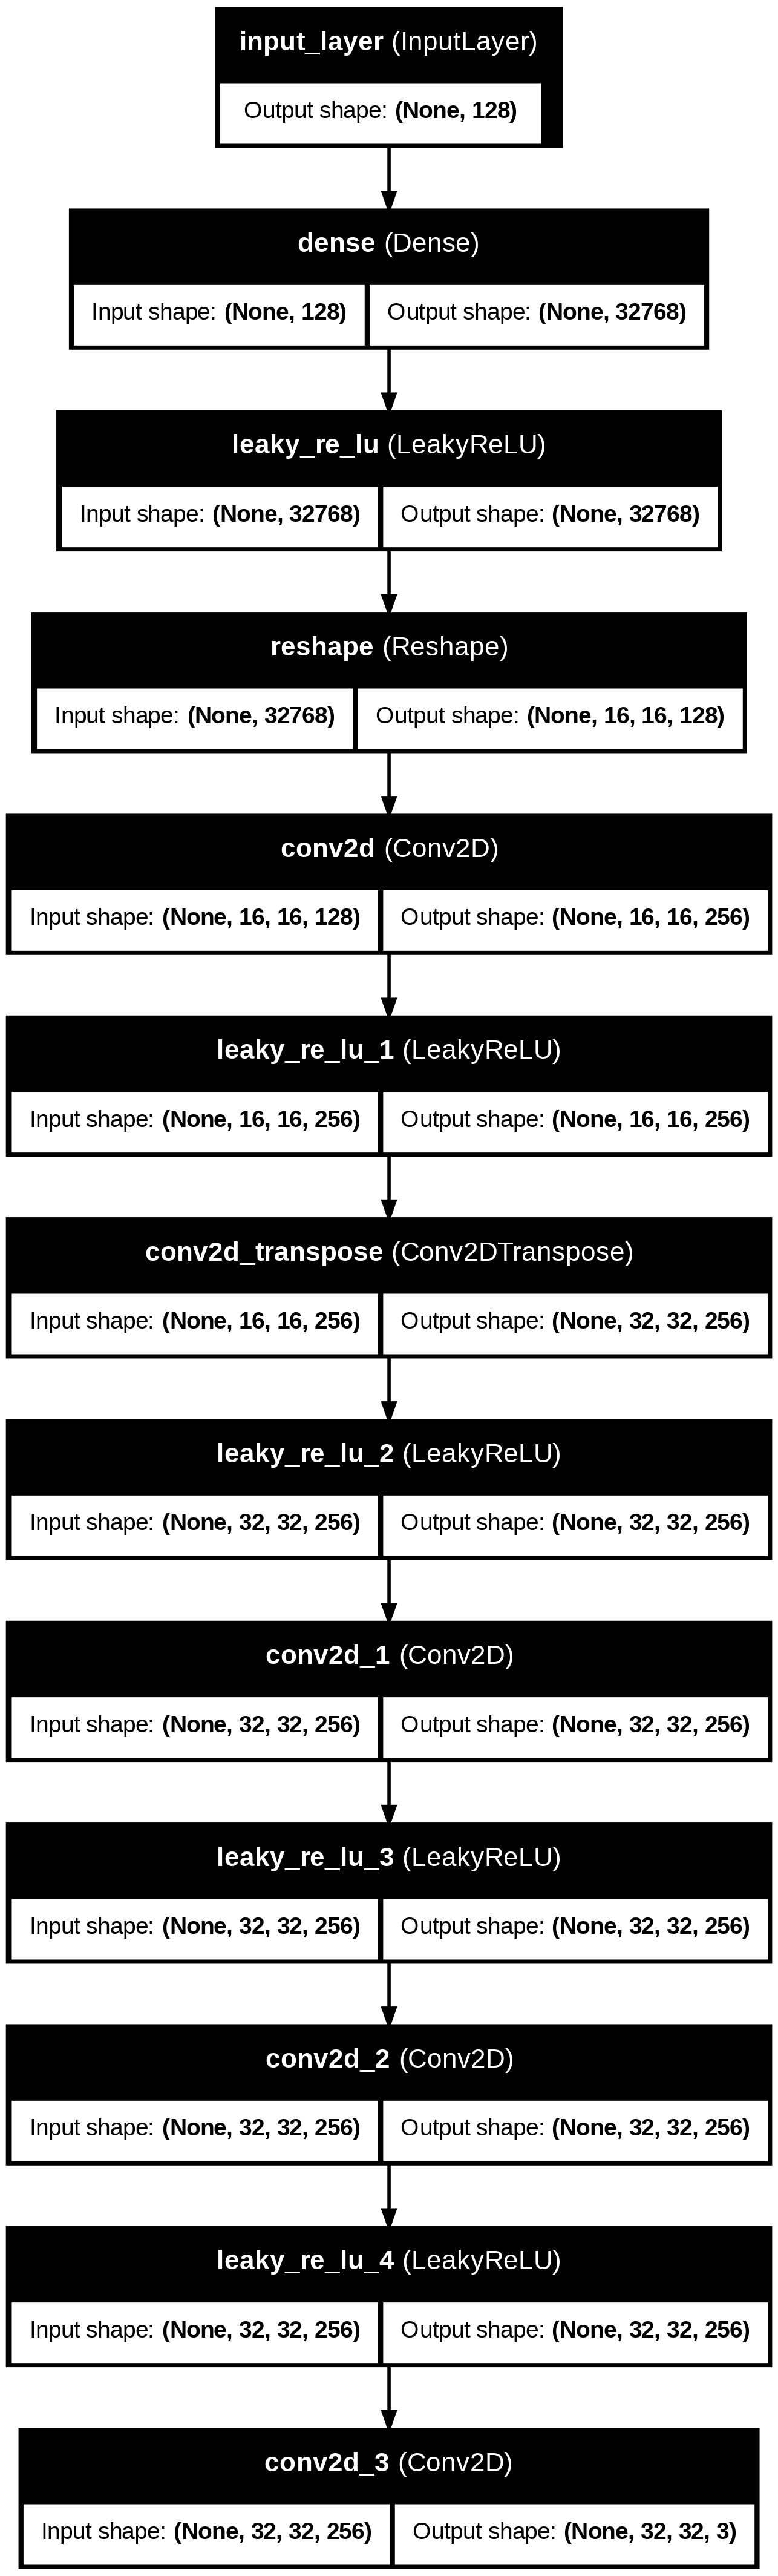

In [3]:
def build_generator(latent_dim, height, width, channels):
    inputs = tf.keras.Input(shape=(latent_dim,))
    x = layers.Dense(128 * 16 * 16)(inputs)
    x = layers.LeakyReLU()(x)
    x = layers.Reshape((16, 16, 128))(x)
    x = layers.Conv2D(256, 5, padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(256, 5, padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(256, 5, padding='same')(x)
    x = layers.LeakyReLU()(x)
    output = layers.Conv2D(channels, 7, activation='tanh', padding='same')(x)
    model = Model(inputs, output, name='Generator')
    print(model.summary())
    return model

# Создание и визуализация генератора
generator = build_generator(latent_dim, height, width, channels)
plot_model(generator, show_shapes=True, show_layer_names=True)


Выход генератора имеет размерность `(None, 32, 32, 3)`, что соответствует заданным параметрам изображений. Это необходимо для того, чтобы сгенерированные данные могли быть корректно обработаны дискриминатором.



#### Дискриминатор

Дискриминатор — это сверточная нейронная сеть, выполняющая задачу бинарной классификации. На вход она принимает изображение, а на выходе возвращает вероятность того, что изображение является реальным. Архитектура дискриминатора включает сверточные слои, слои подвыборки (strided convolutions) и полносвязный слой с сигмоидальной функцией активации:



/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "Discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 6, 6, 128)           │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 2, 2, 128)           │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 790,913 (3.02 MB)

 Trainable params: 790,913 (3.02 MB)

 Non-trainable params: 0 (0.00 B)

None


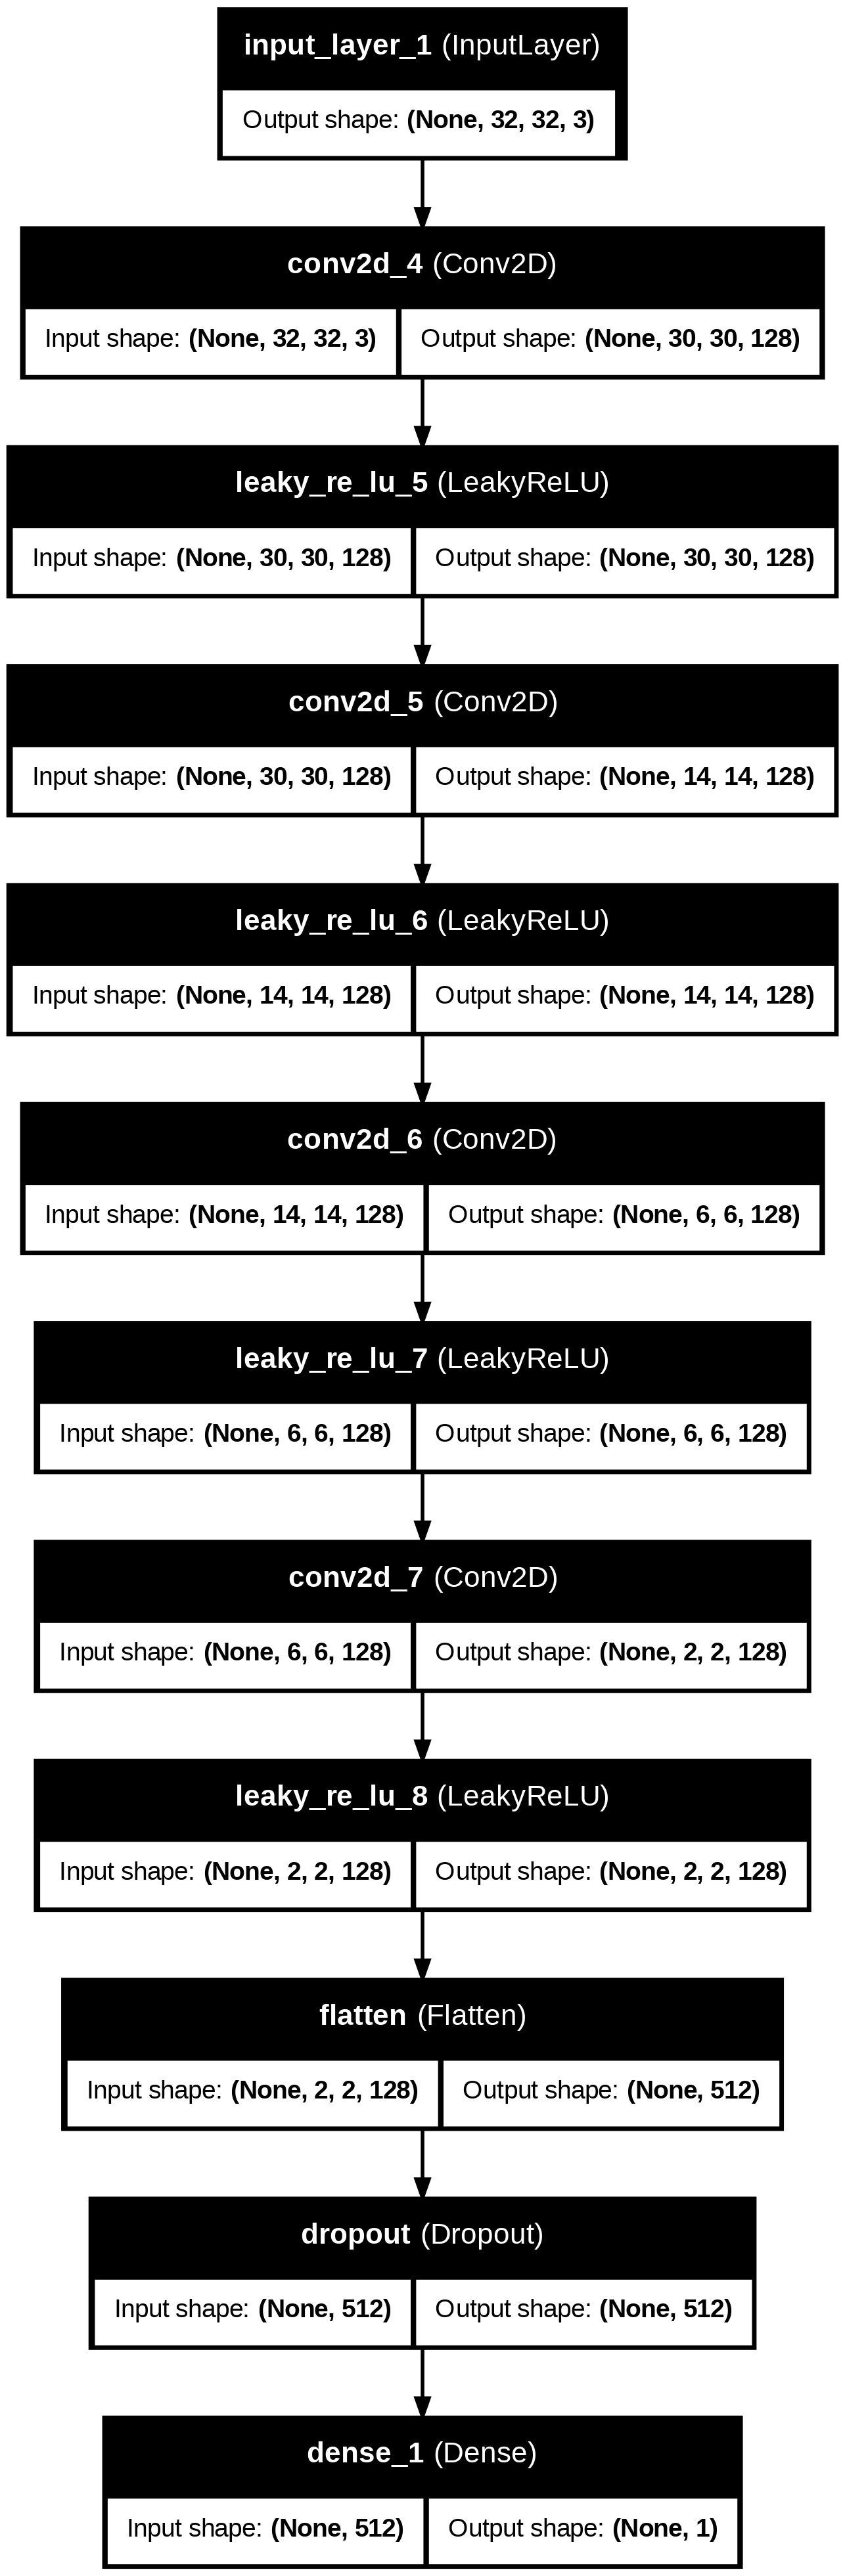

In [4]:
def build_discriminator(height, width, channels):
    inputs = tf.keras.Input(shape=(height, width, channels))
    x = layers.Conv2D(128, 3)(inputs)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(128, 4, strides=2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(128, 4, strides=2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(128, 4, strides=2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(0.4)(x)
    output = layers.Dense(1, activation='sigmoid')(x)
    model = Model(inputs, output, name='Discriminator')
    optimizer = optimizers.RMSprop(learning_rate=0.0008, clipvalue=1.0, decay=1e-8)
    model.compile(optimizer=optimizer, loss='binary_crossentropy')
    print(model.summary())
    return model

# Создание и визуализация дискриминатора
discriminator = build_discriminator(height, width, channels)
plot_model(discriminator, show_shapes=True, show_layer_names=True)




### Объединение генератора и дискриминатора в GAN

Для обучения GAN необходимо объединить генератор и дискриминатор в единую модель. При этом дискриминатор временно замораживается, чтобы избежать его обновления в процессе обучения генератора. Входом GAN является случайный вектор из латентного пространства, а выходом — оценка сгенерированного изображения дискриминатором:


Model: "GAN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Generator (Functional)               │ (None, 32, 32, 3)           │       9,410,307 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Discriminator (Functional)           │ (None, 1)                   │         790,913 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,201,220 (38.91 MB)

 Trainable params: 9,410,307 (35.90 MB)

 Non-trainable params: 790,913 (3.02 MB)

None


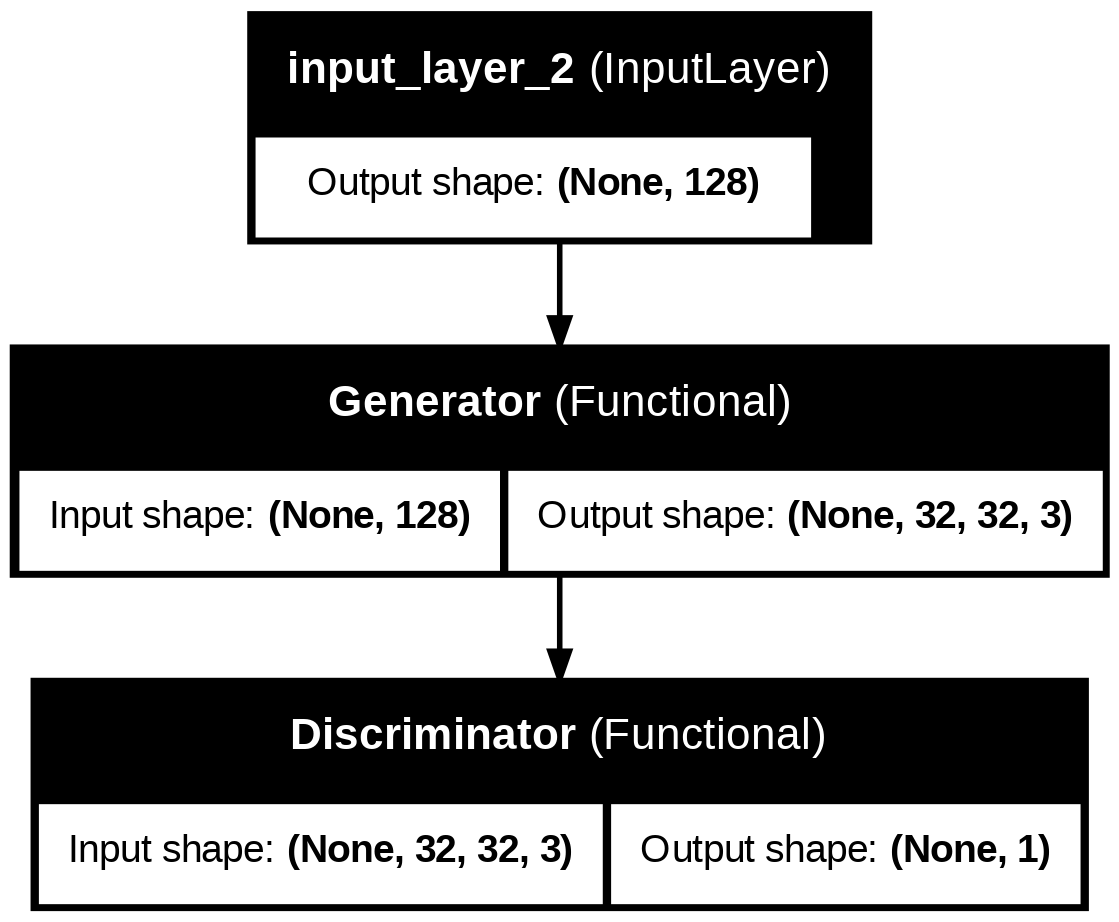

In [5]:
# Замораживание дискриминатора
discriminator.trainable = False

# Определение GAN
gan_input = tf.keras.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output, name='GAN')
optimizer = optimizers.RMSprop(learning_rate=0.0004, clipvalue=1.0, decay=1e-8)
gan.compile(optimizer=optimizer, loss='binary_crossentropy')

# Вывод информации о GAN и визуализация
print(gan.summary())
plot_model(gan, show_shapes=True, show_layer_names=True)



### Обучение модели

Теперь перейдем к обучению нашей модели. Для начала загрузим набор данных. В данном случае мы будем использовать изображения из набора CIFAR-10. Этот набор данных содержит изображения низкого разрешения, поэтому выходные данные также будут достаточно грубыми. Тем не менее, это хорошая отправная точка для демонстрации работы GAN.

Один из нетривиальных подходов, который мы используем, — это объединение обучающих и тестовых данных. Для GAN нет необходимости разделять данные на обучающие и тестовые: напротив, чем больше данных доступно для обучения, тем лучше. Можно возразить, что тестовые данные необходимы для оценки работы дискриминатора, что является справедливым замечанием. Однако конечная цель данной работы — создание высокопроизводительного генератора, а не дискриминатора, поэтому мы опустим этот аспект.


In [6]:
def load_dataset(class_label):
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
    X_train = X_train[y_train.flatten() == class_label]
    X_test = X_test[y_test.flatten() == class_label]
    X_train = X_train.astype('float64') / 255.0
    X_test = X_test.astype('float64') / 255.0
    combined_data = np.concatenate([X_train, X_test])
    return combined_data


Для данного примера мы будем использовать изображения кораблей, которые имеют метку 8. Загрузим соответствующие данные:


In [7]:
train_image = load_dataset(8)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


Набор данных содержит 6000 изображений, что достаточно для начала обучения GAN:



In [8]:
train_image.shape  # (6000, 32, 32, 3)

(6000, 32, 32, 3)






### Функция обучения GAN

Для обучения GAN определим функцию `train_gan`. Основная задача этой функции — создание бинарных меток для реальных и сгенерированных изображений. Напомним, что цель дискриминатора — успешно отличать сгенерированные изображения от реальных. Для создания сгенерированных изображений генератор использует выборку из латентного пространства. Процесс обучения включает следующие шаги:

1. Выборка случайного вектора для подачи на вход генератора.
2. Создание меток "0" для сгенерированных изображений.
3. Создание меток "1" для реальных изображений из обучающего набора.
4. Обучение дискриминатора на этих метках.
5. Обучение GAN путем принудительного присвоения метки "1" для всех изображений.

Эти шаги реализованы в функции `train_gan`:



In [9]:
def train_gan(batch_size, iter_num, latent_dim, data, gan_model, generator_model, discriminator_model):
    start = 0
    d_loss_lst, gan_loss_lst = [], []
    for step in range(iter_num):
        # Генерация случайных векторов и создание изображений
        random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))
        generated_images = generator_model.predict(random_latent_vectors)

        # Выбор реальных изображений
        real_images = data[start: start + batch_size]
        combined_images = np.concatenate([generated_images, real_images])

        # Создание меток с небольшим шумом
        labels = np.concatenate([np.zeros((batch_size, 1)), np.ones((batch_size, 1))])
        labels += 0.05 * np.random.random(labels.shape)

        # Обучение дискриминатора
        d_loss = discriminator_model.train_on_batch(combined_images, labels)
        d_loss_lst.append(d_loss)

        # Обучение GAN (генератора)
        random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))
        misleading_labels = np.ones((batch_size, 1))
        gan_loss = gan_model.train_on_batch(random_latent_vectors, misleading_labels)
        gan_loss_lst.append(gan_loss)

        # Логирование процесса
        if step % 200 == 0:
            print(f"Iteration {step}/{iter_num}")
            #print(f"[==============================] d-loss: {d_loss_lst[-1]:.3f}, gan-loss: {gan_loss_lst[-1]:.3f}")

        # Обновление индекса для выбора данных
        start += batch_size
        if start > len(data) - batch_size:
            start = 0

    return gan_model, generator_model, discriminator_model, d_loss_lst, gan_loss_lst




### Нюансы обучения

1. **Добавление шума к меткам**: Небольшой шум добавляется к меткам для ускорения процесса обучения. Этот прием часто используется при обучении GAN, так как он способствует сглаживанию функции потерь и улучшает сходимость модели.

2. **Обучение генератора через GAN**: Обучение генератора происходит косвенно через обучение GAN. Принудительное присвоение метки "1" для всех изображений заставляет генератор создавать более реалистичные изображения, а неудачи штрафуются.



### Запуск обучения

Теперь запустим обучение модели:


In [ ]:
batch_size = 32
iter_num = 10000

gan, generator, discriminator, d_history, gan_history = train_gan(
    batch_size, iter_num, latent_dim, train_image, gan, generator, discriminator
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Iteration 0/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 




### Анализ результатов

#### Визуализация сгенерированных изображений

После завершения обучения визуализируем результаты:


In [ ]:
def show_generated_image(generator_model, latent_dim, row_num=4):
    num_image = row_num**2
    random_latent_vectors = np.random.normal(size=(num_image, latent_dim))
    generated_images = generator_model.predict(random_latent_vectors)
    plt.figure(figsize=(10, 10))
    for i in range(num_image):
        img = tf.keras.utils.array_to_img(generated_images[i] * 255., scale=False)
        plt.subplot(row_num, row_num, i + 1)
        plt.grid(False)
        plt.xticks([]); plt.yticks([])
        plt.imshow(img)
    plt.show()

show_generated_image(generator, latent_dim)


Сгенерированные изображения могут быть размытыми и пикселизированными, но некоторые из них действительно напоминают корабли. Это свидетельствует о том, что модель успешно обучается, несмотря на простоту архитектуры.

#### Кривая обучения

Построим график функции потерь для анализа процесса обучения:


In [ ]:
def plot_learning_curve(d_loss_lst, gan_loss_lst):
    fig = plt.figure()
    plt.plot(d_loss_lst, color='skyblue', label='Discriminator Loss')
    plt.plot(gan_loss_lst, color='gold', label='GAN Loss')
    plt.title('Model Learning Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Cross Entropy Loss')
    plt.legend()
    plt.show()

plot_learning_curve(d_history, gan_history)


Кривая обучения демонстрирует нестабильность, что характерно для GAN. Это связано с необходимостью балансировки между генератором и дискриминатором. Однако значительных признаков неудачи (например, экспоненциального роста потерь) не наблюдается, что указывает на успешное завершение обучения.



### Заключение

В данной работе представлен процесс обучения простой GAN для генерации изображений кораблей. Несмотря на ограниченность архитектуры и данных, модель демонстрирует способность создавать узнаваемые изображения. В будущих исследованиях можно рассмотреть математические основы GAN для более глубокого понимания процессов, происходящих при обучении генератора и дискриминатора.

